##Nama : Dany Widiyanto
##Universitas Trunojoyo Madura
danywidiyanto99@gmail.com

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
import os


2.4.1


In [2]:
!pip install split-folders tqdm

In [3]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-04-21 20:00:24--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  9.57MB/s    in 45s     

2021-04-21 20:01:09 (6.89 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [4]:
# melakukan ekstraksi pada file zip
import zipfile,os
import splitfolders
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
splitfolders.ratio(base_dir, output='/tmp/rockpaperscissors', seed=1337 ,ratio=(.6,.4))
train_dir = os.path.join('/tmp/rockpaperscissors', 'train')
validation_dir = os.path.join('/tmp/rockpaperscissors', 'val')

Copying files: 2188 files [00:00, 2439.07 files/s]


In [5]:
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [6]:
os.listdir('/tmp/rockpaperscissors/train')

['rock', 'scissors', 'paper']

In [7]:
os.listdir('/tmp/rockpaperscissors/val')

['rock', 'scissors', 'paper']

In [8]:
train_rock_dir,validation_rock_dir = train_test_split(os.listdir(rock_dir),test_size =0.4)
train_paper_dir,validation_paper_dir = train_test_split(os.listdir(paper_dir),test_size =0.4)
train_scissors_dir,validation_scissors_dir = train_test_split(os.listdir(scissors_dir),test_size =0.4)

In [9]:
# membuat direktori rock pada direktori data training
train_rock_dir = os.path.join(train_dir, 'rock')
 
# membuat direktori paper pada direktori data training
train_paper_dir = os.path.join(train_dir, 'paper')

# membuat direktori scissors pada direktori data training
train_scissors_dir = os.path.join(train_dir, 'scissors')
 
# membuat direktori rock pada direktori data validasi
validation_rock_dir = os.path.join(validation_dir, 'rock')
 
# membuat direktori paper pada direktori data validasi
validation_paper_dir = os.path.join(validation_dir, 'paper')

# membuat direktori scissors pada direktori data validasi
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

In [10]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32,
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [13]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=20,
      validation_data=validation_generator, 
      validation_steps=5,
      verbose=2,  
)

Epoch 1/20
25/25 - 49s - loss: 1.1269 - accuracy: 0.3400 - val_loss: 1.0576 - val_accuracy: 0.3750
Epoch 2/20
25/25 - 47s - loss: 0.8833 - accuracy: 0.6000 - val_loss: 0.7307 - val_accuracy: 0.7812
Epoch 3/20
25/25 - 47s - loss: 0.5271 - accuracy: 0.8175 - val_loss: 0.4269 - val_accuracy: 0.8250
Epoch 4/20
25/25 - 47s - loss: 0.2685 - accuracy: 0.9013 - val_loss: 0.3536 - val_accuracy: 0.9000
Epoch 5/20
25/25 - 48s - loss: 0.2136 - accuracy: 0.9150 - val_loss: 0.2942 - val_accuracy: 0.9062
Epoch 6/20
25/25 - 48s - loss: 0.1671 - accuracy: 0.9350 - val_loss: 0.2095 - val_accuracy: 0.9438
Epoch 7/20
25/25 - 47s - loss: 0.1881 - accuracy: 0.9400 - val_loss: 0.1893 - val_accuracy: 0.9500
Epoch 8/20
25/25 - 47s - loss: 0.1352 - accuracy: 0.9575 - val_loss: 0.1294 - val_accuracy: 0.9625
Epoch 9/20
25/25 - 47s - loss: 0.1343 - accuracy: 0.9450 - val_loss: 0.1388 - val_accuracy: 0.9625
Epoch 10/20
25/25 - 48s - loss: 0.1191 - accuracy: 0.9663 - val_loss: 0.1583 - val_accuracy: 0.9563
Epoch 11/

Saving IMG_20210422_030846.jpg to IMG_20210422_030846.jpg
IMG_20210422_030846.jpg
Scissors


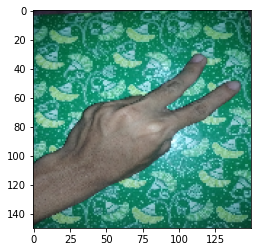

In [14]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('Paper')
  elif classes[0][1]==1:
    print('Rock')
  elif classes[0][2]==1:
    print('Scissors')